In [ ]:
# Install all needed packages
import numpy as np
from sklearn.decomposition import NMF, PCA, non_negative_factorization
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image, ImageOps 
import os
import pickle

In [ ]:
# Load all Chinese and English videos (2 for each)
en_dir = "./drive/MyDrive/Cultural_Analysis_Frames/english_selected_frames"
ch_dir = "./drive/MyDrive/Cultural_Analysis_Frames/chinese_selected_frames"
en_pic = []
ch_pic = []
count = 0
for image_pair_filename in os.listdir(en_dir):
    image_pair_path = os.path.join(en_dir, image_pair_filename)
    pic = np.asarray(ImageOps.grayscale(Image.open(image_pair_path).resize((540,240))))
    en_pic.append(pic)
    if count == 0:
        overall_en_pic = pic.reshape(1,-1)
    else:
        overall_en_pic = np.vstack([overall_en_pic, pic.reshape(1,-1)])
    count += 1
count = 0
for image_pair_filename in os.listdir(ch_dir):
    image_pair_path = os.path.join(ch_dir, image_pair_filename)
    pic = np.asarray(ImageOps.grayscale(Image.open(image_pair_path).resize((540,240))))
    ch_pic.append(pic)
    if count == 0:
        overall_ch_pic = pic.reshape(1,-1)
    else:
        overall_ch_pic = np.vstack([overall_ch_pic, pic.reshape(1,-1)])
    count += 1

In [ ]:
# Image Size Change
print("Previous shape: (1080, 1920, 4)")
print("Current shape: ", pic.shape)

Previous shape: (1080, 1920, 4)
Current shape:  (240, 540)


In [ ]:
#@title
# Use PCA to decide the number of clusters (English)
model_pca = PCA()
model_pca.fit_transform(overall_en_pic)
information_direction = model_pca.explained_variance_ratio_
for i in range(len(information_direction)):
    print(i+1, "Component information", information_direction[i]*100, "%")
    
# Number of clusters for English: 13

KeyboardInterrupt: 

In [ ]:
# Use PCA to decide the number of clusters (Chinese)
model_pca_ch = PCA()
model_pca_ch.fit_transform(overall_ch_pic)
information_direction_ch = model_pca_ch.explained_variance_ratio_
for i in range(len(information_direction_ch)):
    print(i+1, "Component information (chinese): ", information_direction_ch[i] * 100, "%")

# Same number of cluster for Chinese videos: 13

1 Component information (chinese):  45.23395804288746 %
2 Component information (chinese):  10.136290031138218 %
3 Component information (chinese):  5.72532623343724 %
4 Component information (chinese):  4.138503866253085 %
5 Component information (chinese):  3.225771584844021 %
6 Component information (chinese):  3.0687266202314034 %
7 Component information (chinese):  2.1292995288645575 %
8 Component information (chinese):  1.8231129763658236 %
9 Component information (chinese):  1.53937520097913 %
10 Component information (chinese):  1.422780378757029 %
11 Component information (chinese):  1.1495391981728902 %
12 Component information (chinese):  1.025919675850101 %
13 Component information (chinese):  1.001227558435959 %
14 Component information (chinese):  0.8107695791968619 %
15 Component information (chinese):  0.7929449661442214 %
16 Component information (chinese):  0.7288439155997983 %
17 Component information (chinese):  0.6912815985522767 %
18 Component information (chinese

311 Component information (chinese):  0.0058652592159100505 %
312 Component information (chinese):  0.005807155820257335 %
313 Component information (chinese):  0.005776462822221392 %
314 Component information (chinese):  0.005774216159277619 %
315 Component information (chinese):  0.0057154828541876495 %
316 Component information (chinese):  0.005697547254580294 %
317 Component information (chinese):  0.005658341939888626 %
318 Component information (chinese):  0.00563453170106277 %
319 Component information (chinese):  0.005619853672321263 %
320 Component information (chinese):  0.005590161310532357 %
321 Component information (chinese):  0.005544888676032144 %
322 Component information (chinese):  0.005539848744822094 %
323 Component information (chinese):  0.005530794307245736 %
324 Component information (chinese):  0.005485968516737824 %
325 Component information (chinese):  0.0054721130061067295 %
326 Component information (chinese):  0.005446232327212748 %
327 Component informat

452 Component information (chinese):  0.00324587754854307 %
453 Component information (chinese):  0.003222887428818085 %
454 Component information (chinese):  0.003220383319109165 %
455 Component information (chinese):  0.0032020031869296932 %
456 Component information (chinese):  0.0031955877672098783 %
457 Component information (chinese):  0.0031810560150490005 %
458 Component information (chinese):  0.003180377235827201 %
459 Component information (chinese):  0.0031551202197467932 %
460 Component information (chinese):  0.003146348698539188 %
461 Component information (chinese):  0.0031395008210517903 %
462 Component information (chinese):  0.0031280933034433466 %
463 Component information (chinese):  0.0030972558911703096 %
464 Component information (chinese):  0.0030926743203202414 %
465 Component information (chinese):  0.0030839970559812355 %
466 Component information (chinese):  0.0030796730643950147 %
467 Component information (chinese):  0.0030704839254383624 %
468 Component 

685 Component information (chinese):  0.0015454374801421016 %
686 Component information (chinese):  0.0015389621113190673 %
687 Component information (chinese):  0.0015350412129989286 %
688 Component information (chinese):  0.0015241973266402022 %
689 Component information (chinese):  0.0015215396020032764 %
690 Component information (chinese):  0.0015166974415835846 %
691 Component information (chinese):  0.0015152927601990952 %
692 Component information (chinese):  0.0015100410588326813 %
693 Component information (chinese):  0.0015055150764688614 %
694 Component information (chinese):  0.0015000935182224791 %
695 Component information (chinese):  0.0014989762926225364 %
696 Component information (chinese):  0.0014928029960979662 %
697 Component information (chinese):  0.0014878089610749889 %
698 Component information (chinese):  0.0014864568034279088 %
699 Component information (chinese):  0.0014807945047111497 %
700 Component information (chinese):  0.0014789046518228256 %
701 Comp

935 Component information (chinese):  0.0007576053884315353 %
936 Component information (chinese):  0.0007533251459002784 %
937 Component information (chinese):  0.0007502882940007351 %
938 Component information (chinese):  0.0007494900588149761 %
939 Component information (chinese):  0.0007444669256068478 %
940 Component information (chinese):  0.000740958923875646 %
941 Component information (chinese):  0.0007379087735757072 %
942 Component information (chinese):  0.000737151467805009 %
943 Component information (chinese):  0.0007362653671790833 %
944 Component information (chinese):  0.0007301675990721584 %
945 Component information (chinese):  0.0007277042800057495 %
946 Component information (chinese):  0.0007243991614308172 %
947 Component information (chinese):  0.0007228482021769632 %
948 Component information (chinese):  0.0007218059381947794 %
949 Component information (chinese):  0.0007210382049376863 %
950 Component information (chinese):  0.0007168337837721916 %
951 Compon

1310 Component information (chinese):  8.008359499211111e-05 %
1311 Component information (chinese):  7.910568160852759e-05 %
1312 Component information (chinese):  7.891953064927965e-05 %
1313 Component information (chinese):  7.864571819863662e-05 %
1314 Component information (chinese):  7.737990085026905e-05 %
1315 Component information (chinese):  7.717587645024854e-05 %
1316 Component information (chinese):  7.69170568199194e-05 %
1317 Component information (chinese):  7.62761133261485e-05 %
1318 Component information (chinese):  7.594036941617416e-05 %
1319 Component information (chinese):  7.532691099734709e-05 %
1320 Component information (chinese):  7.381069284826372e-05 %
1321 Component information (chinese):  7.189856735034456e-05 %
1322 Component information (chinese):  7.129323371800546e-05 %
1323 Component information (chinese):  7.055622109251575e-05 %
1324 Component information (chinese):  7.019987402685749e-05 %
1325 Component information (chinese):  6.930503216352548e

In [ ]:
print("The first 13 principle components explain: ", sum(information_direction[0:13]*100),"of the variation in the dataset")
print("The first 13 principle components explain: ", sum(information_direction_ch[0:13]*100),"of the variation in the dataset")

The first 13 principle components explain:  78.99856192781108 of the variation in the dataset
The first 13 principle components explain:  81.61983089621692 of the variation in the dataset


In [ ]:
from sklearn.decomposition import non_negative_factorization

In [ ]:
# Fit NMF Model on English dataset: 
model_en = NMF(n_components=13, init='random', random_state=0, max_iter = 500)
features_en = model_en.fit_transform(overall_en_pic)

In [ ]:
model_en.components_.shape

(13, 129600)

In [ ]:
# Fit NMF Model on Chinese dataset: 
model_ch = NMF(n_components=13, init='random', random_state=0, max_iter = 500)
features_ch = model_ch.fit_transform(overall_ch_pic)

In [ ]:
model_ch.components_.shape

(13, 129600)

In [ ]:
# cluster
def clustering(feature):
    num = len(feature)
    cluster = []
    for i in range(num):
        cluster.append(np.argmax(feature[i,:]))
    return cluster

### English Clustering

In [ ]:
cluster_en = clustering(features_en)
cluster_en_img = []
for i in range(model_en.components_.shape[0]):
    img_index = [j for j, x in enumerate(cluster_en) if x == i]
    cluster_en_img.append(img_index)

English Cluster Number:  0


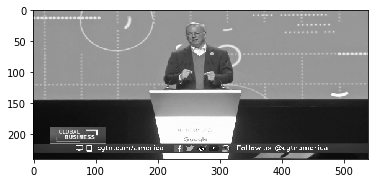

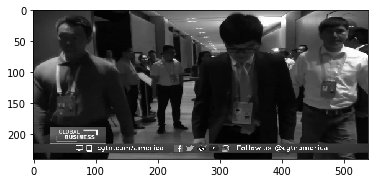

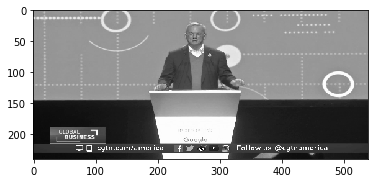

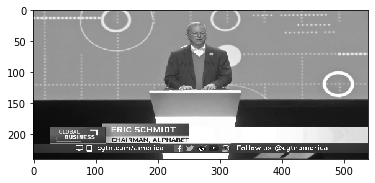

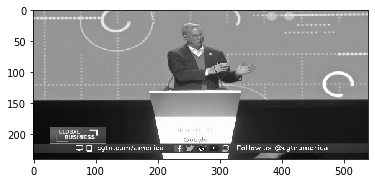

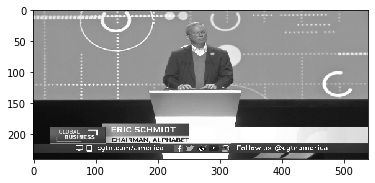

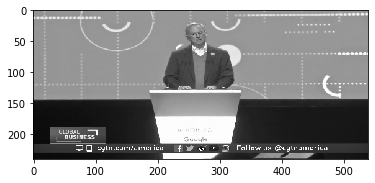

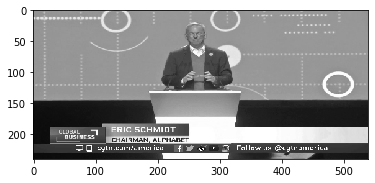

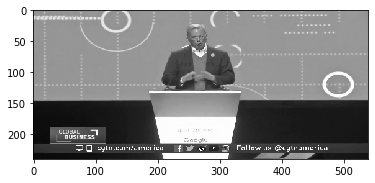

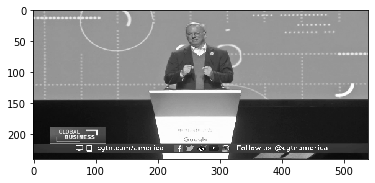

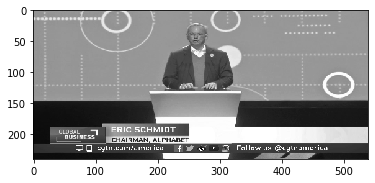

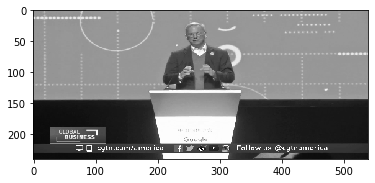

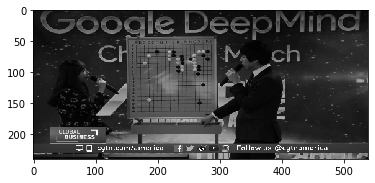

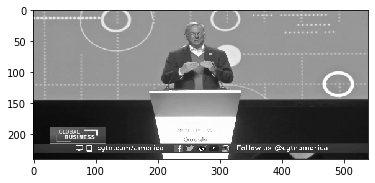

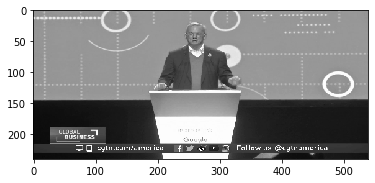

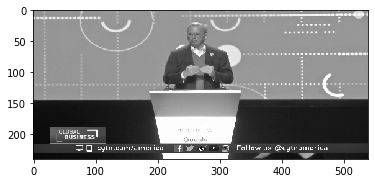

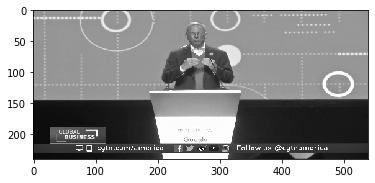

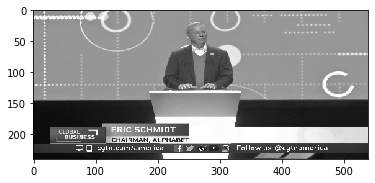

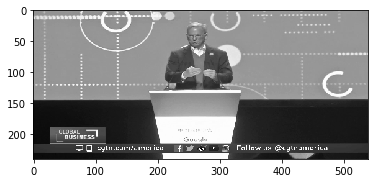

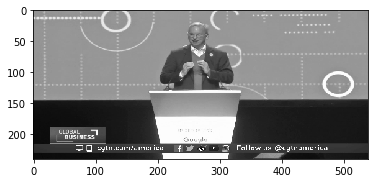

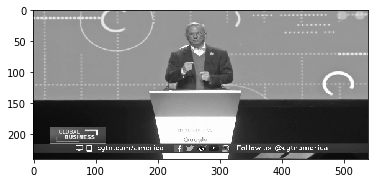

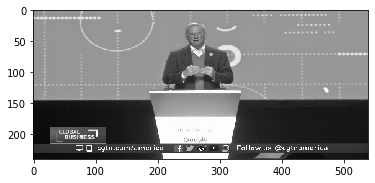

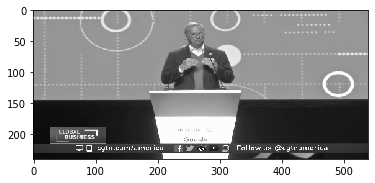

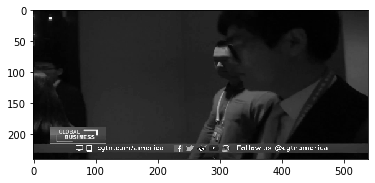

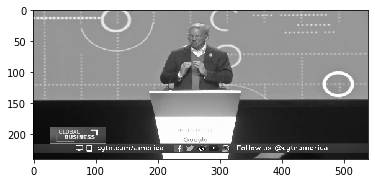

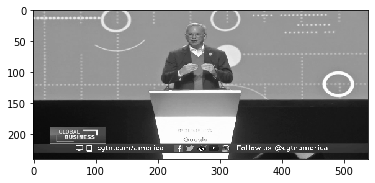

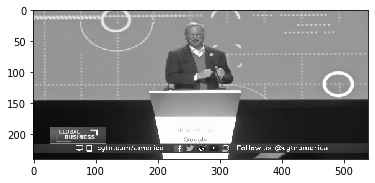

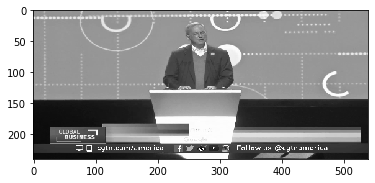

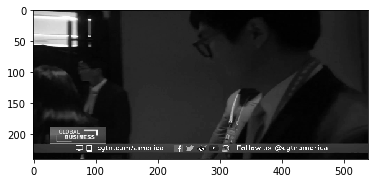

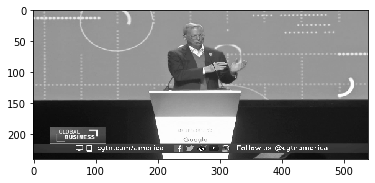

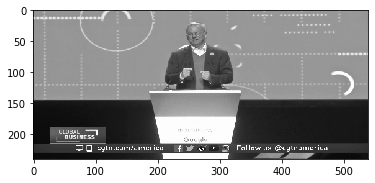

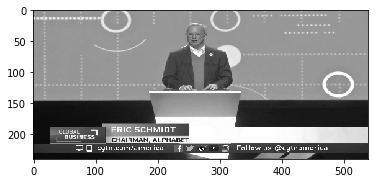

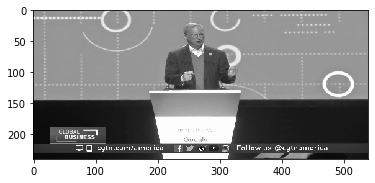

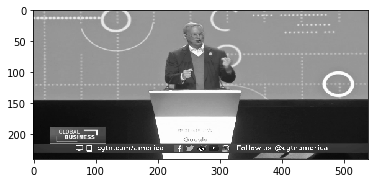

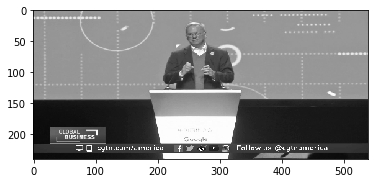

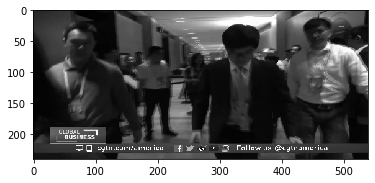

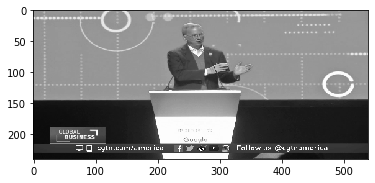

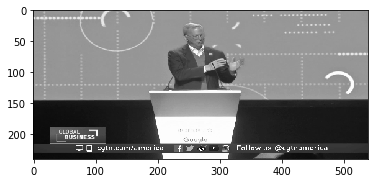

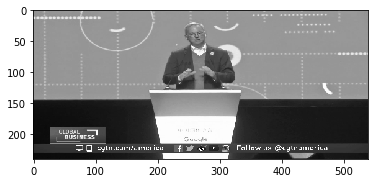

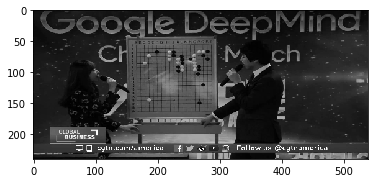

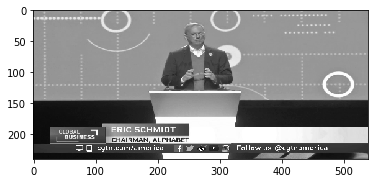

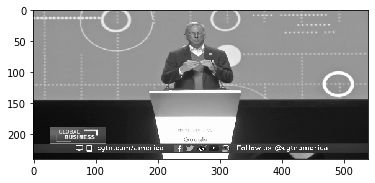

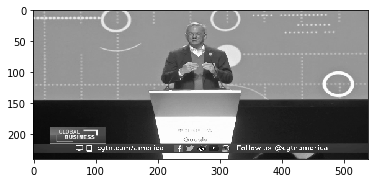

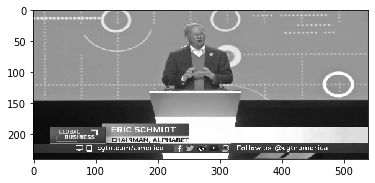

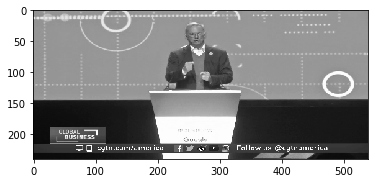

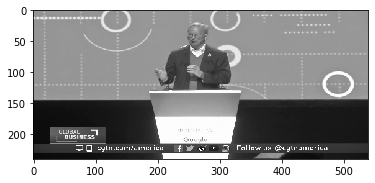

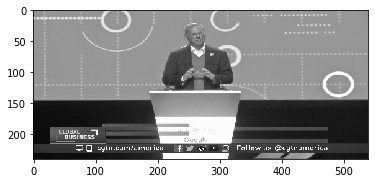

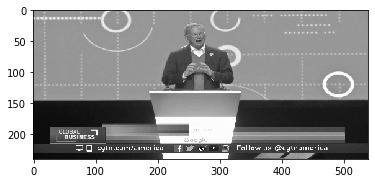

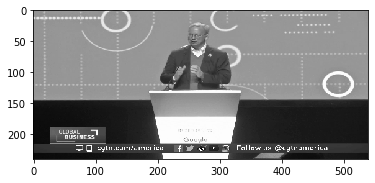

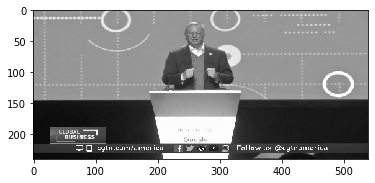

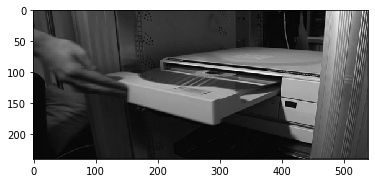

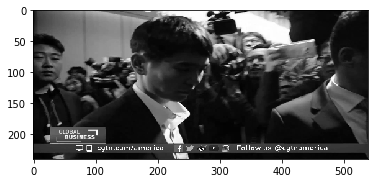

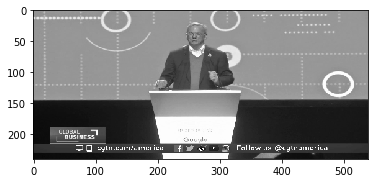

In [ ]:
cluster_en_num = 0
print("English Cluster Number: ", cluster_en_num)
cluster_img = cluster_en_img[cluster_en_num]
for i in cluster_img:
    pic = en_pic[i]
    plt.imshow(pic, cmap="gray")
    plt.show()

### Chinese Clustering

In [ ]:
cluster_ch = clustering(features_ch)
cluster_ch_img = []
for i in range(model_ch.components_.shape[0]):
    img_index = [j for j, x in enumerate(cluster_ch) if x == i]
    cluster_ch_img.append(img_index)

Chinese Cluster Number:  12


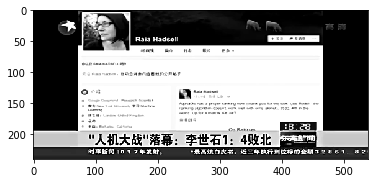

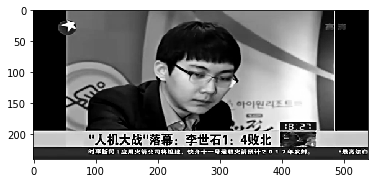

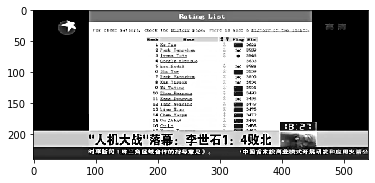

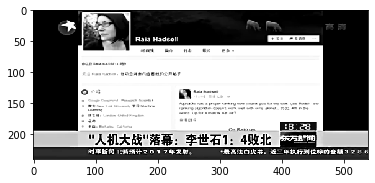

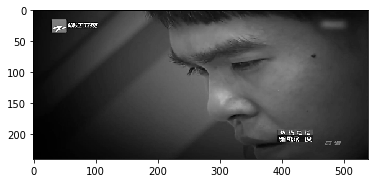

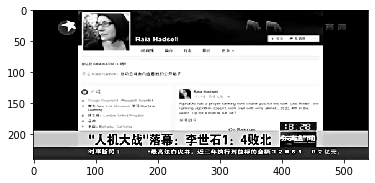

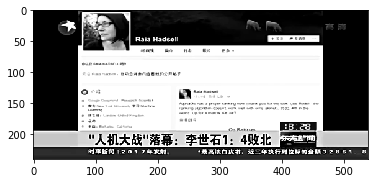

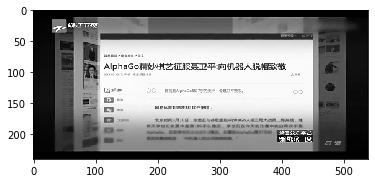

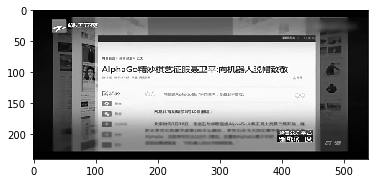

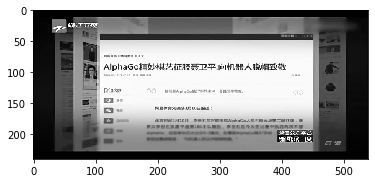

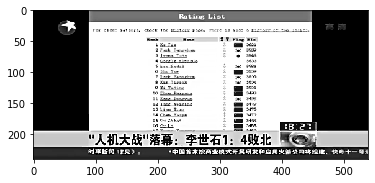

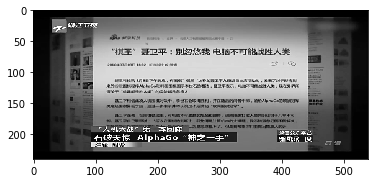

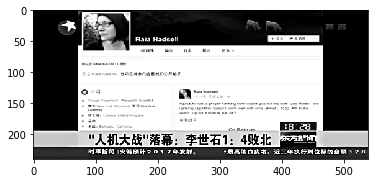

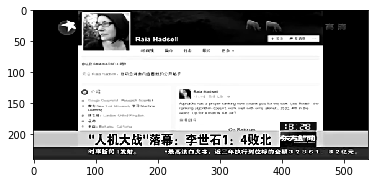

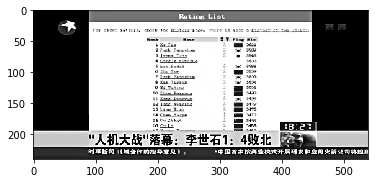

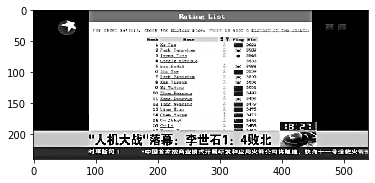

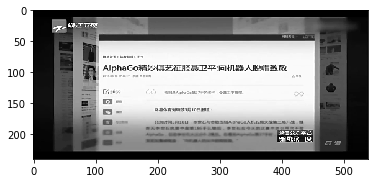

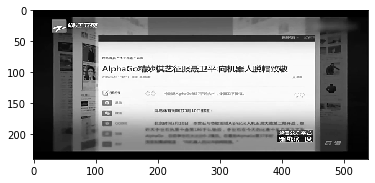

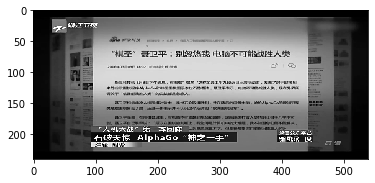

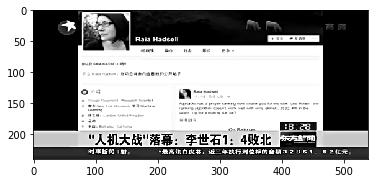

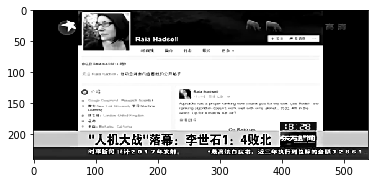

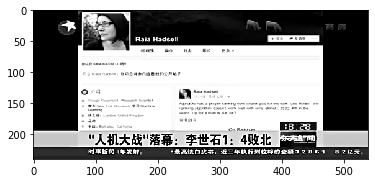

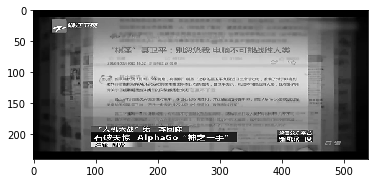

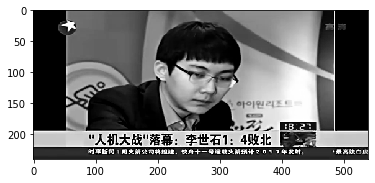

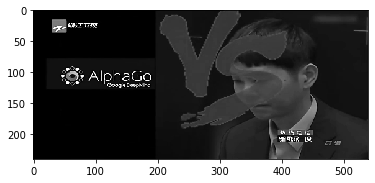

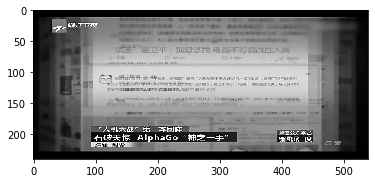

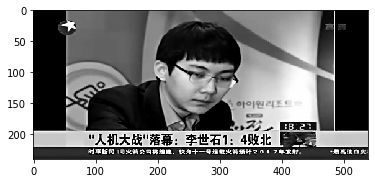

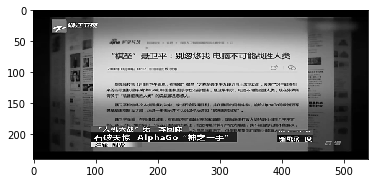

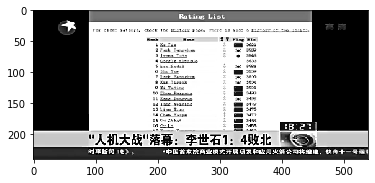

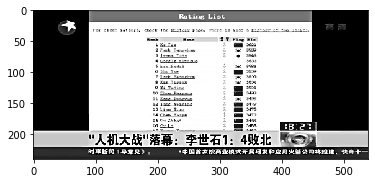

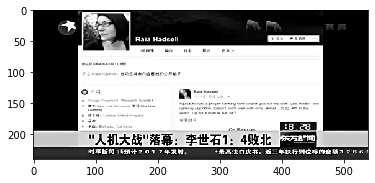

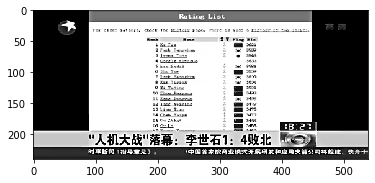

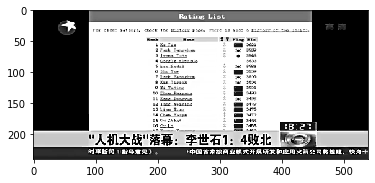

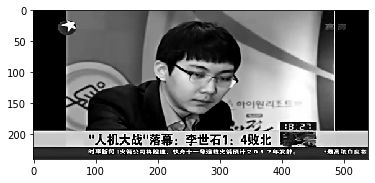

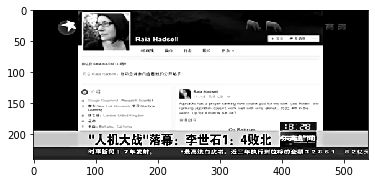

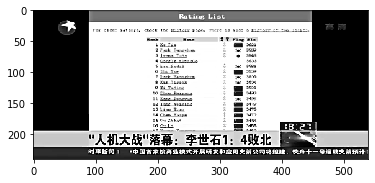

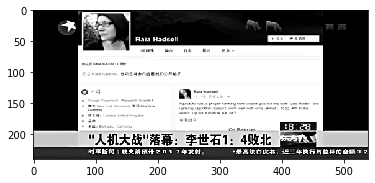

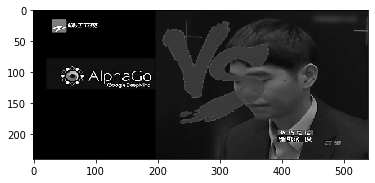

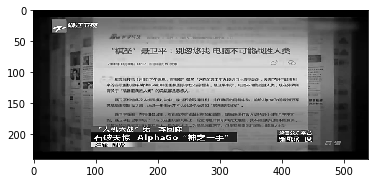

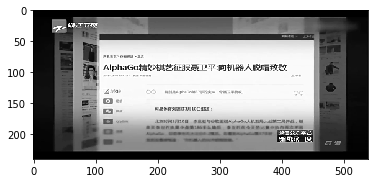

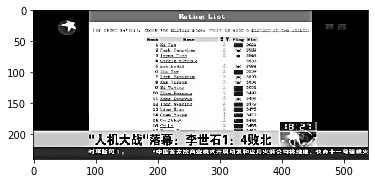

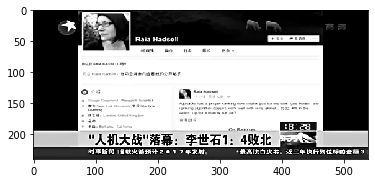

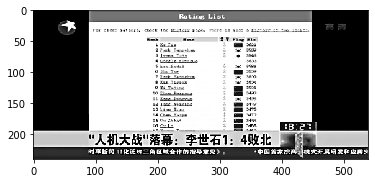

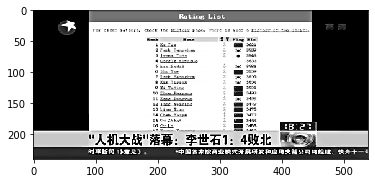

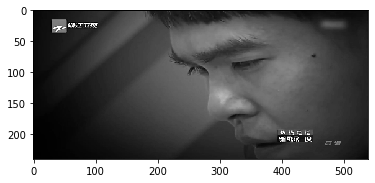

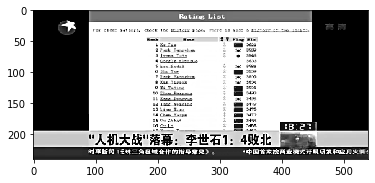

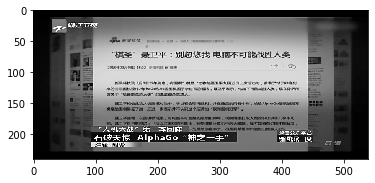

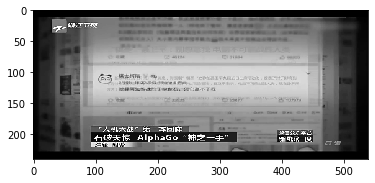

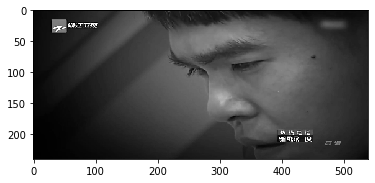

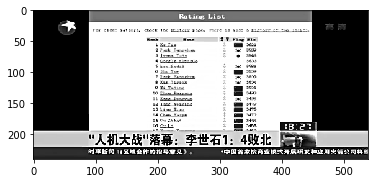

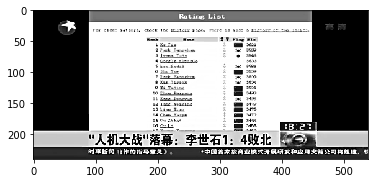

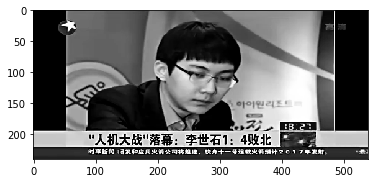

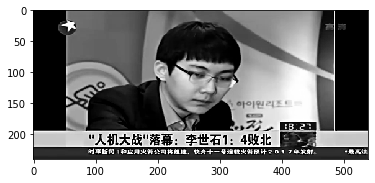

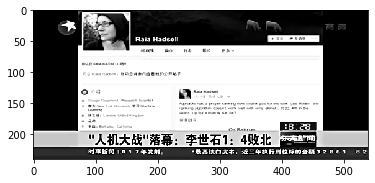

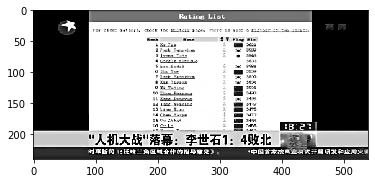

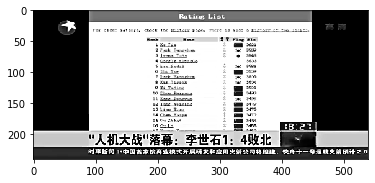

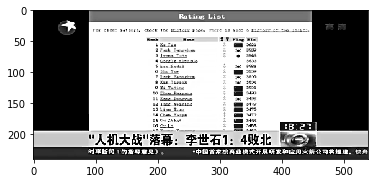

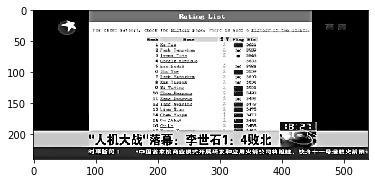

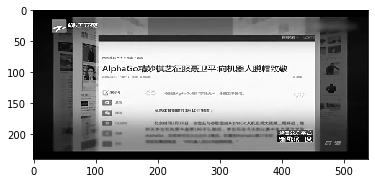

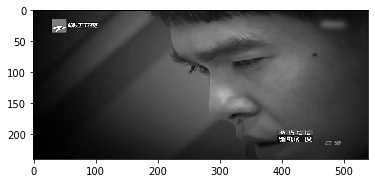

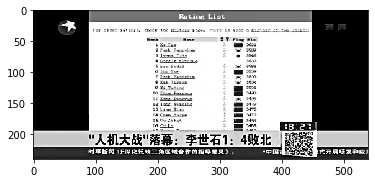

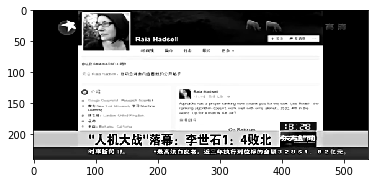

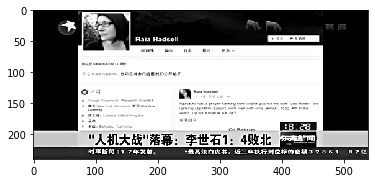

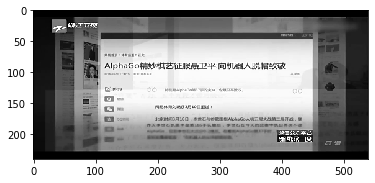

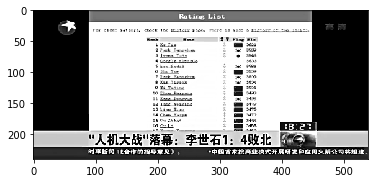

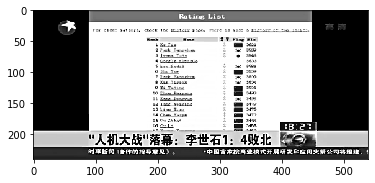

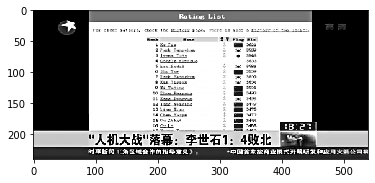

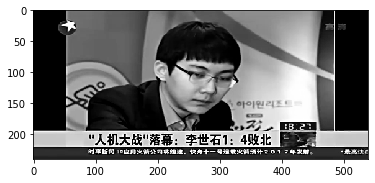

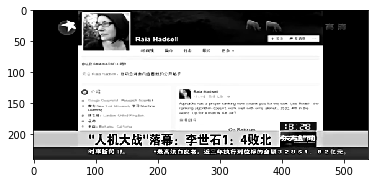

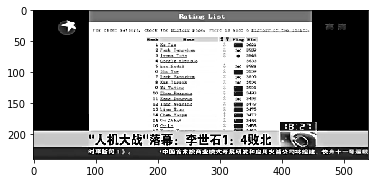

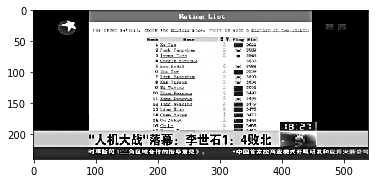

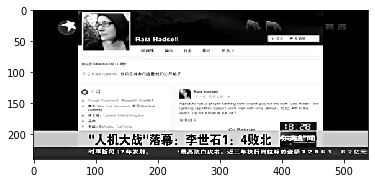

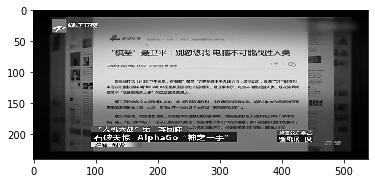

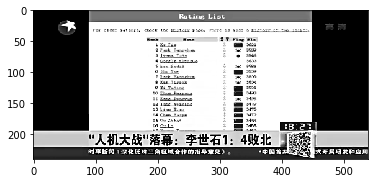

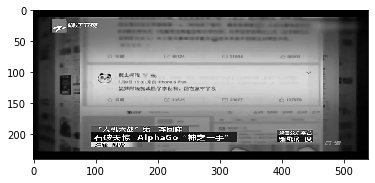

In [ ]:
cluster_ch_num = 12
print("Chinese Cluster Number: ", cluster_ch_num)
cluster_img = cluster_ch_img[cluster_ch_num]
for i in cluster_img:
    pic = ch_pic[i]
    plt.imshow(pic, cmap = "gray")
    plt.show()